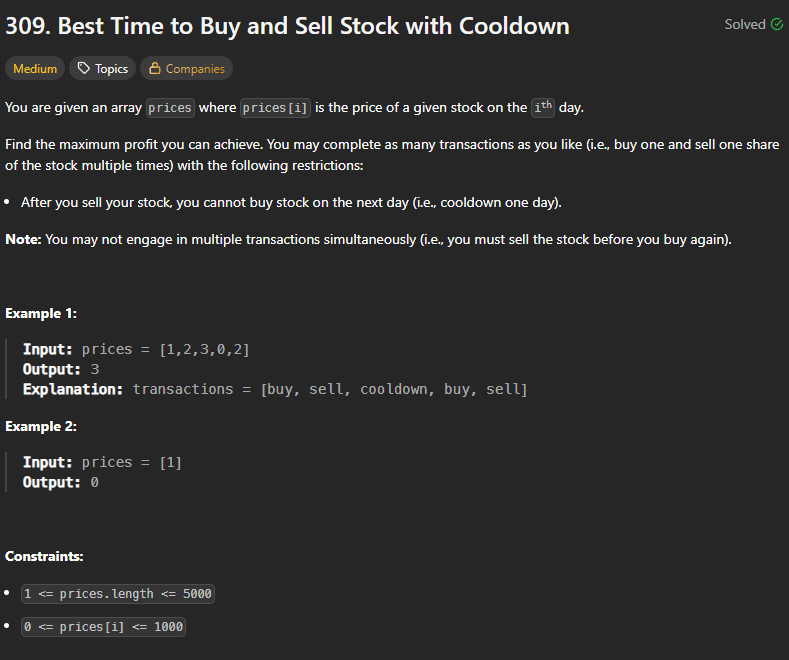

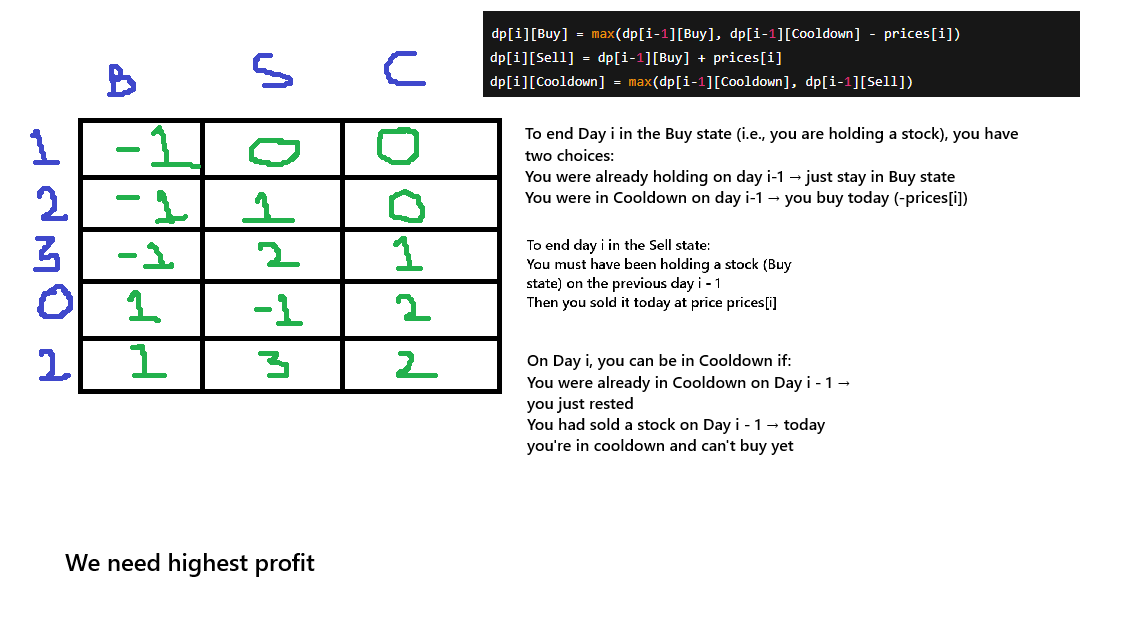

###  Dynamic Programming

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        n = len(prices)
        if n == 0:
            return 0

        # Initialize dp table: each row is [Buy, Sell, Cooldown]
        dp = [[0] * 3 for _ in range(n)]

        # Base case: Day 0
        dp[0][0] = -prices[0]  # Buy
        dp[0][1] = 0           # Sell
        dp[0][2] = 0           # Cooldown

        for i in range(1, n):
            dp[i][0] = max(dp[i-1][0], dp[i-1][2] - prices[i])     # Buy/Hold
            dp[i][1] = dp[i-1][0] + prices[i]                      # Sell
            dp[i][2] = max(dp[i-1][1], dp[i-1][2])                 # Cooldown/Rest

        # Final answer: max of Sell or Cooldown state on last day
        return max(dp[n-1][1], dp[n-1][2])


###  Recursion

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        
        def helper(i, can_buy):
            if i >= len(prices):
                return 0

            if can_buy:
                return max(
                    helper(i + 1, False) - prices[i],  # Buy
                    helper(i + 1, True)                # Skip
                )
            else:
                return max(
                    prices[i] + helper(i + 2, True),   # Sell (with cooldown)
                    helper(i + 1, False)               # Skip
                )

        return helper(0, True)


###  Memoization

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        memo = {}

        def helper(i, can_buy):
            if i >= len(prices):
                return 0

            if (i, can_buy) in memo:
                return memo[(i, can_buy)]

            if can_buy:
                profit = max(
                    helper(i + 1, False) - prices[i],  # Buy
                    helper(i + 1, True)                # Skip
                )
            else:
                profit = max(
                    prices[i] + helper(i + 2, True),   # Sell (with cooldown)
                    helper(i + 1, False)               # Skip
                )

            memo[(i, can_buy)] = profit
            return profit

        return helper(0, True)